In [23]:
# Importamos librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

In [50]:
# Generar datos aleatorios

np.random.seed(0) # Con esta línea aseguramos que los resultados siempre sean los mismos
X1 = np.random.rand(12, 1) * 100  # Creamos un vector con 12 elementos del 0 al 100
X2 = np.random.rand(12, 1) * 50   # Creamos un vector con 12 elementos del 0 al 50

y = 2 * X1 + 3 * X2 + (np.random.randn(12, 1) * 10) # Creamos un vector con 12 elementos
                                                    # que son 2 veces x1 mas 3 veces x2 y
                                                    # le sumamos un número de 0 a 10

In [52]:
# Imaginemos que nuestro vector X1 representa la inversión en publicidad en televisión
# de una empresa (En miles de pesos), X2 representa la inversión en radio (en miles de pesos)
# y Y representa los ingresos de la empresa en miles de pesos, todo ello, medido en 12 meses.
# Para ello, reasignamos el nombre de las variables: (Creamos un Dataframe para visualizar)

meses = range(12)
inv_tele = X1.round(2) # Con round redondeamos a dos decimales
inv_radio = X2.round(2)
ingresos = y.round(2)

# Dataframe usando un diccionario
dict = {'Meses': meses, 'Inv. Tele': inv_tele.tolist(), 'Inv. Radio': inv_radio.tolist(), 'Ingresos': ingresos.tolist()} 
df = pd.DataFrame(dict)
df

,Meses,Inv. Tele,Inv. Radio,Ingresos
0,0,[54.88],[28.4],[198.1]
1,1,[71.52],[46.28],[273.34]
2,2,[60.28],[3.55],[105.68]
3,3,[54.49],[4.36],[128.58]
4,4,[42.37],[1.01],[96.41]
5,5,[64.59],[41.63],[246.65]
6,6,[43.76],[38.91],[226.94]
7,7,[89.18],[43.5],[294.31]
8,8,[96.37],[48.93],[339.98]
9,9,[38.34],[39.96],[194.69]


In [60]:
# Crear el modelo de regresión lineal múltiple (Con sklearn)
# El método es exactamente el mismo que para la regresión lineal simple

modelo_rlm = LinearRegression()

In [61]:
# Combinamos las características en una matriz de Variables Independientes
# (Es necesario hacer esto para la regresión lineal múltiple)
# Queda como una tupla de dos elementos por cada valor de la lista

variables_independientes = np.hstack((inv_tele, inv_radio))
variables_independientes

array([[54.88, 28.4 ],
       [71.52, 46.28],
       [60.28,  3.55],
       [54.49,  4.36],
       [42.37,  1.01],
       [64.59, 41.63],
       [43.76, 38.91],
       [89.18, 43.5 ],
       [96.37, 48.93],
       [38.34, 39.96],
       [79.17, 23.07],
       [52.89, 39.03]])

In [62]:
# Entrenar el modelo utilizando los datos
modelo_rlm.fit(variables_independientes, ingresos)

LinearRegression()

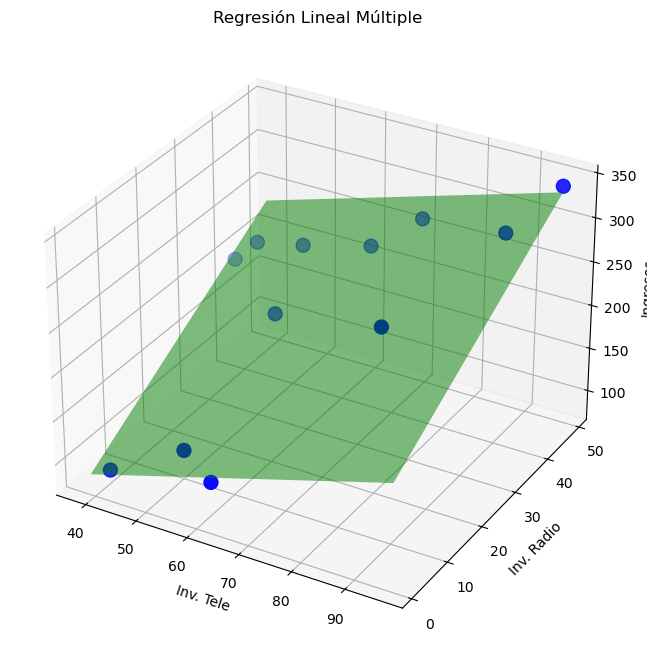

In [68]:
# Creamos la gráfica o ploteo (3 Dimensiones)

fig = plt.figure(figsize=(8, 8)) # Tamaño de la figura o del gráfico
ax = fig.add_subplot(111, projection='3d') # Tipo de gráfico 3D

# Graficar los datos
ax.scatter(variables_independientes[:, 0], variables_independientes[:, 1], ingresos,
           color='blue', marker='o', s=100, label='Datos')

# Crear los planos de regresión para cada variable independiente
x1_surface, x2_surface = np.meshgrid(np.linspace(min(variables_independientes[:, 0]),
                                                 max(variables_independientes[:, 0]), 10),
                                     np.linspace(min(variables_independientes[:, 1]),
                                                 max(variables_independientes[:, 1]), 10))

# graficamos los intercepros del modelo al extraerlos directamente de sus parámetros
Z = modelo_rlm.intercept_ + modelo_rlm.coef_[0][0] * x1_surface + modelo_rlm.coef_[0][1] * x2_surface
ax.plot_surface(x1_surface, x2_surface, Z, alpha=0.5, rstride=100, cstride=100, color='green')

# Etiquetas de los ejes
ax.set_xlabel('Inv. Tele')
ax.set_ylabel('Inv. Radio')
ax.set_zlabel('Ingresos')

# Título del gráfico
plt.title('Regresión Lineal Múltiple')

# Mostrar el gráfico
plt.show()